In [48]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.train_dsn import train_dsn
from dsn.util.systems import SCCircuit
from dsn.util.dsn_util import get_savedir, get_system_from_template
from dsn.util.plot_util import assess_constraints, plot_opt, dsn_pairplots, \
                               pairplot, lin_reg_plot
from tf_util.stat_util import approx_equal
import matplotlib.backends.backend_pdf
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
EPS = 1e-16

p = 0.75
inact_str = "NI"

dirstr = 'SC_WTA_%s' % inact_str

# create an instance of the V1_circuit system class
fixed_params = {'E_constant':0.0, \
                'E_Pbias':0.1, \
                'E_Prule':0.5, \
                'E_Arule':0.5, \
                'E_choice':-0.2, \
                'E_light':0.1};

C = 1

param_str = "full"
behavior_type = "WTA"
means = np.array([p, 0.0, 1.0])
if (p==0.0 or p==1.0):
    behavior = {
        "type": behavior_type,
        "means": means,
        "inact_str":inact_str
    }
else:
    behavior = {
        "type": behavior_type,
        "means": means,
        "bounds":np.zeros(C),
        "inact_str":inact_str
    }

model_opts = {"params":param_str, "C":C}
system = SCCircuit(fixed_params, behavior, model_opts)

get_system_from_template()

# normalizing flow layer architecture
flow_type = 'PlanarFlow'
# number of layers
nlayers = 10
mult_and_shift = 'post'
arch_dict = {'K': 1, \
             'D':system.D, \
             'post_affine':True, \
             'flow_type':flow_type, \
             'repeats':nlayers};
lr_order = -3



# multivariate normal initialization variance
sigma_init = 1.0
c_init_order = 5

start_rs = 1
num_rs = 2
random_seeds = np.arange(start_rs, num_rs+start_rs)


1 /Users/sbittner/Documents/dsn/dsn/models/SC_WTA_NI/SCCircuit_D=8_WTA_mu=7.50E-01_0.00E+00_1.00E+00_flow=10P_M_A_sigma=1.00_c=5_rs=1/
2 /Users/sbittner/Documents/dsn/dsn/models/SC_WTA_NI/SCCircuit_D=8_WTA_mu=7.50E-01_0.00E+00_1.00E+00_flow=10P_M_A_sigma=1.00_c=5_rs=2/
al final
[array(280), array(555)]


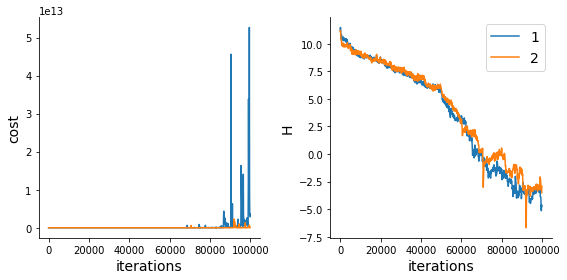

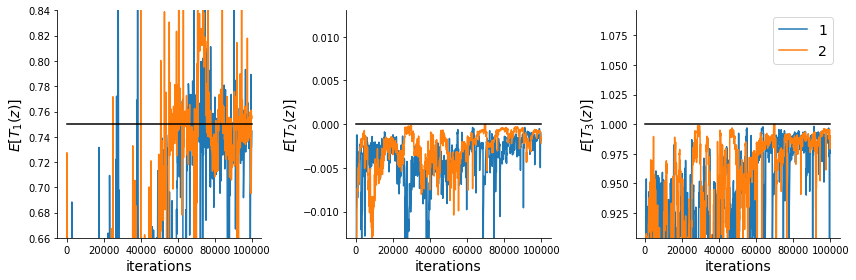

In [69]:
basedir = '/Users/sbittner/Documents/dsn/dsn/'
model_dirs = []
legendstrs = []
AL_final_its = []
fnames = []
for i in range(num_rs):
    random_seed = random_seeds[i]
    dsndir = basedir + get_savedir(system, arch_dict, sigma_init, c_init_order, random_seed, dirstr)
    model_dirs.append(dsndir)
    legendstrs = [1, 2]
    fnames.append(dsndir + 'opt_info.npz')
    print(i+1, dsndir)

figs, AL_final_its, p_values = plot_opt(model_dirs, legendstrs, con_method='2', maxconlim=0.5, tol=0.01)


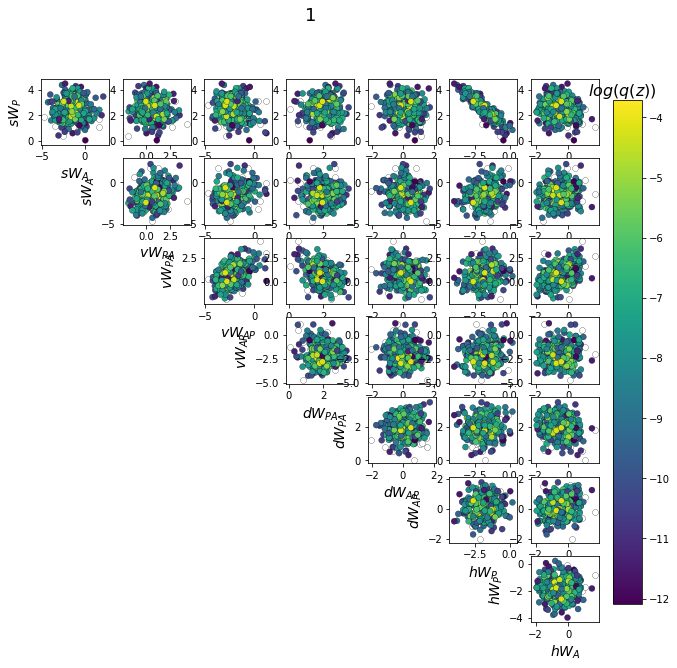

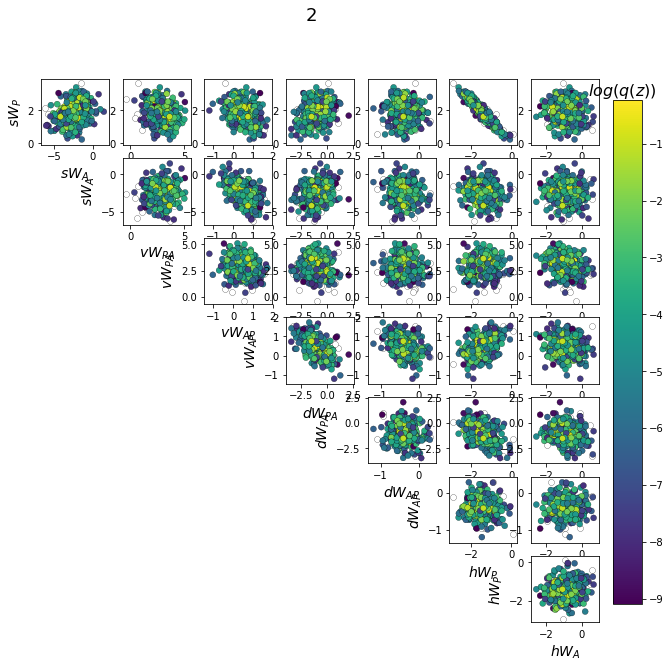

In [70]:
#pfnames = ['images/Z_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]

Zs = dsn_pairplots(model_dirs, 'Zs', system, system.D, f_str='identity', \
              c_str='log_q_z', legendstrs=legendstrs, AL_final_its=AL_final_its, \
              fontsize=14, ellipses=False, tri=True) #3, pfnames=pfnames)


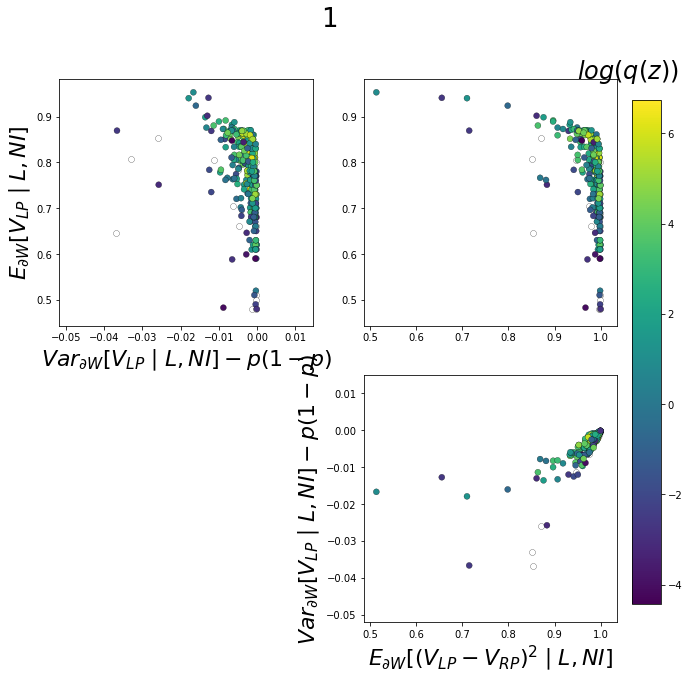

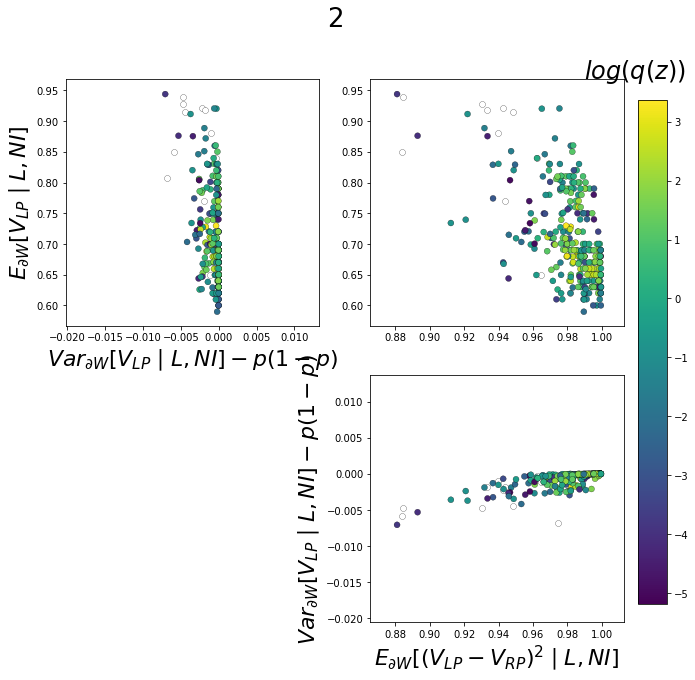

In [71]:
#pfnames = ['images/T_x_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
T_xs = dsn_pairplots(model_dirs, 'T_xs', system, system.num_suff_stats, f_str='identity', \
              c_str='log_q_z', legendstrs=legendstrs, AL_final_its=[800, 800], \
              fontsize=22, ellipses=False, tri=True) #, pfnames=pfnames)        

